# Pennylane: I. Introduction to Quantum Computing
## I.6. From a Different Angle

In [1]:
# preparation
import numpy as np
import pennylane as qml
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

### Codercise I.6.1 - Applying RX

In addition to RZ, there are also RX and RY rotations.

**Task**: Perform the RX rotation with an angle of $\pi$ to one of the computational bsis states.

**Solution**: We can perform the RX operation just like we do with the RZ rotation.

In [2]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################
        
    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires=dev.wires)
    
    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))

[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


### Plotting Functions
Before plotting anything, we define two plotting functions. One is from the PennyLane tutorial and another one is by us. For that, we need three libraries:
1. Matplotlib
2. Pandas
3. Altair

In [3]:
# defining pennyLane plotter function
def penny_plotter(angles, amplitudes):
    """Plot the value of the output

    Args:
        angles (np.array[float]): Angles for the x axis.
        amplitudes (np.array[complex]): State after applying RX(theta)
    """

    df = pd.DataFrame(
        {
            "theta": angles,
            "|0> real": amplitudes[:, 0].real,
            "|0> imag": amplitudes[:, 0].imag,
            "|1> real": amplitudes[:, 1].real,
            "|1> imag": amplitudes[:, 1].imag,
        }
    )

    plot_1 = (
        alt.Chart(df)
        .transform_fold(["|0> real", "|1> real"], ["quantity", "amplitude"])
        .mark_line()
        .encode(x="theta:Q", y="amplitude:Q", color="quantity:N")
    )

    plot_2 = (
        alt.Chart(df)
        .transform_fold(["|0> imag", "|1> imag"], ["quantity", "amplitude"])
        .mark_line()
        .encode(x="theta:Q", y="amplitude:Q", color="quantity:N")
    )

    return plot_1 + plot_2

In [4]:
# defining my own plotter function
def our_plotter(x, y):  
    r = np.real(y) # Real part
    i = np.imag(y) # Imaginary part
    plt.plot(x, r)
    plt.plot(x, i)
    plt.xlabel('theta')
    plt.ylabel('amplitude')
    plt.legend(["|0>real", "|1>real", "|0>imag", "|1>imag"])
    plt.grid(True)
    try:
        plt.xticks(np.arange(min(x), max(x) + 1, 1))  # Unit grid on x-axis
        plt.yticks(np.arange(min(y), max(y) + 1, 1))  # Unit grid on y-axis
    except ValueError:
        pass
    plt.show()

### Codercise I.6.2 - Plotting RX

The matrix representation of RX is-

$$RX(\theta)=
\begin{pmatrix}
cos(\frac{\theta}{2}) & -i ~ sin(\frac{\theta}{2})\\
-i ~ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2})
\end{pmatrix}$$

**Task**: Perform the RX rotation with an angle of $\theta$ to the state $|0\rangle$. Repeat the step to various angles to understand how the amplitudes are affected.

**Solution**: This is a simple problem that requires multiple function calls. Plotting a graph gives us a visual understanding. The graph contains the sine and cosine curves.

In [5]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, dev.wires)
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = penny_plotter(angles, output_states) # use default plotter from the tutorial
plot

alt.LayerChart(...)

### Codercise I.6.3 - Plotting RY

**Task**:  Perform the RY rotation with an angle of $\theta$ to the state $|0\rangle$. Repeat the step to various angles to understand how the amplitudes are affected.

**Solution**: The previous solution applies to this problem. Again, the graph contains the sine and cosine curves. However, we can see that there is no imaginary part of $|1\rangle$. This is a main difference to the above RX plot.

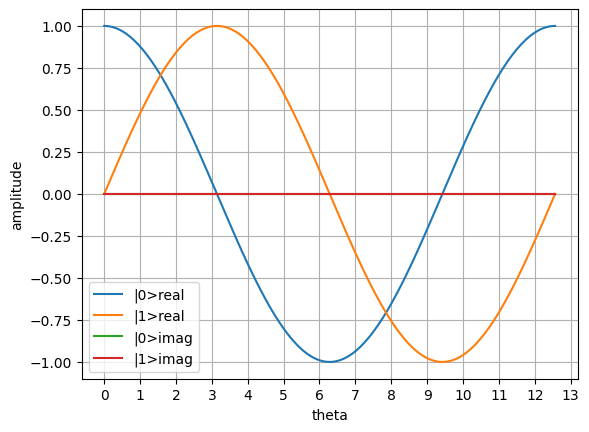

In [6]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, dev.wires)
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = our_plotter(angles, output_states) # use a custom plotter
plot

This notebook is done by `Myanmar Youths` for `Womanium Quantum + AI 2024` program.
- <a href="https://www.linkedin.com/in/la-wun-nannda-b047681b5/"><u>La Wun Nannda</u></a>
- <a href="https://www.linkedin.com/in/chit-zin-win-46a2a3263/"><u>Chit Zin Win</u></a>